In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bike-sharing-demand/sampleSubmission.csv
/kaggle/input/bike-sharing-demand/train.csv
/kaggle/input/bike-sharing-demand/test.csv


In [2]:
train=pd.read_csv('/kaggle/input/bike-sharing-demand/train.csv')
test=pd.read_csv('/kaggle/input/bike-sharing-demand/test.csv')
display(train,test)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [3]:
train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [4]:
# Time feature 값별로 중요도 평가
# 위의 alldata와 다르기때문에 다시 생성해주어야 한다
alldata2 = pd.concat([train,test])
alldata2['datetime'] = pd.to_datetime(alldata2['datetime'])
alldata2['Time'] = alldata2['datetime'].dt.hour

alldata2.groupby('Time')['count'].mean()

Time
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: count, dtype: float64

## Feature Extraction : year, month, day, time

In [5]:
train['datetime']=train['datetime'].astype('datetime64')
train['hour']=train['datetime'].dt.hour
train['year']=train['datetime'].dt.year
train['weekday']=train['datetime'].dt.weekday

test['datetime']=test['datetime'].astype('datetime64')
test['hour']=test['datetime'].dt.hour
test['year']=test['datetime'].dt.year
test['weekday']=test['datetime'].dt.weekday

test2=test.drop(['datetime'],1)
test2

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,year,weekday
0,1,0,1,1,10.66,11.365,56,26.0027,0,2011,3
1,1,0,1,1,10.66,13.635,56,0.0000,1,2011,3
2,1,0,1,1,10.66,13.635,56,0.0000,2,2011,3
3,1,0,1,1,10.66,12.880,56,11.0014,3,2011,3
4,1,0,1,1,10.66,12.880,56,11.0014,4,2011,3
...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014,19,2012,0
6489,1,0,1,2,10.66,12.880,60,11.0014,20,2012,0
6490,1,0,1,1,10.66,12.880,60,11.0014,21,2012,0
6491,1,0,1,1,10.66,13.635,56,8.9981,22,2012,0


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='hour', ylabel='count'>

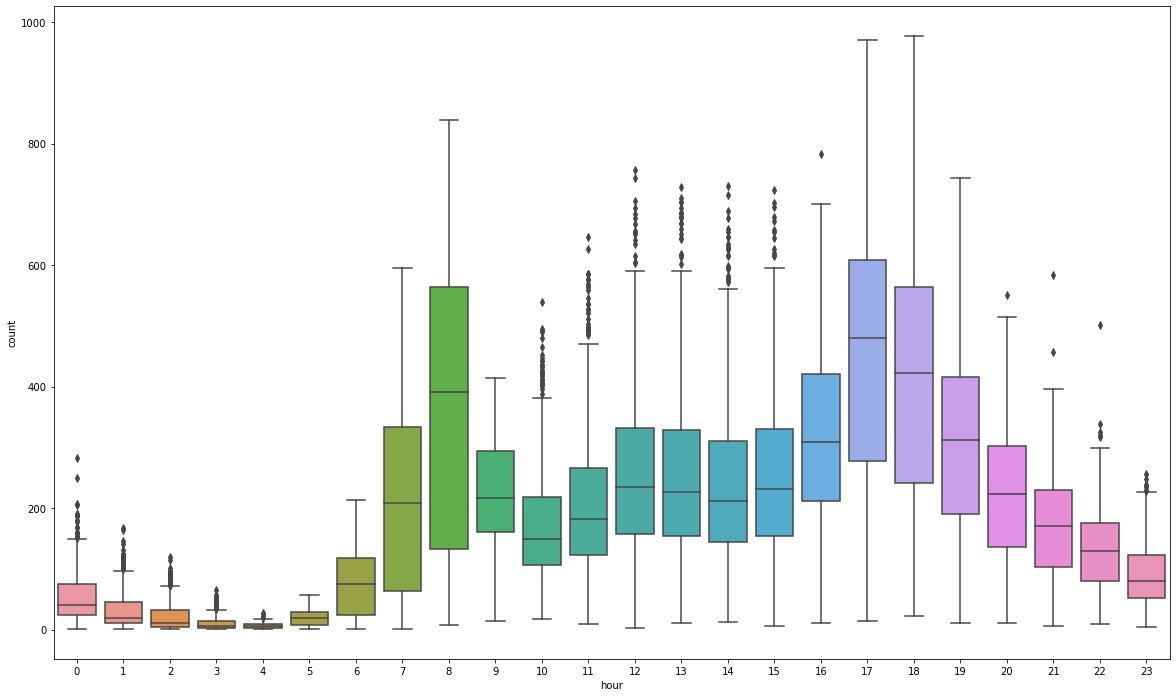

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,12))
sns.boxplot(train['hour'],train['count'])

In [7]:
train2=train.drop(['datetime','casual','registered','count'],1)
train2

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,year,weekday
0,1,0,0,1,9.84,14.395,81,0.0000,0,2011,5
1,1,0,0,1,9.02,13.635,80,0.0000,1,2011,5
2,1,0,0,1,9.02,13.635,80,0.0000,2,2011,5
3,1,0,0,1,9.84,14.395,75,0.0000,3,2011,5
4,1,0,0,1,9.84,14.395,75,0.0000,4,2011,5
...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,19,2012,2
10882,4,0,1,1,14.76,17.425,57,15.0013,20,2012,2
10883,4,0,1,1,13.94,15.910,61,15.0013,21,2012,2
10884,4,0,1,1,13.94,17.425,61,6.0032,22,2012,2


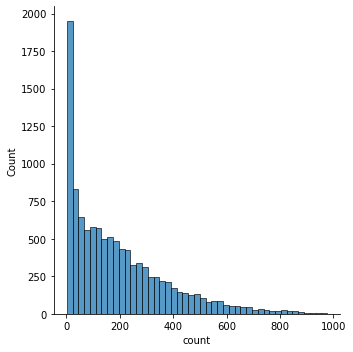

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot((train['count']))
plt.show()

## Target value &rarr; log transformation : 불균형 완화 효과

In [9]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(train2,np.log(train['count']))
result=rf.predict(test2)
result

array([2.47785396, 1.57792988, 1.18746994, ..., 4.60678748, 4.605739  ,
       3.83647588])

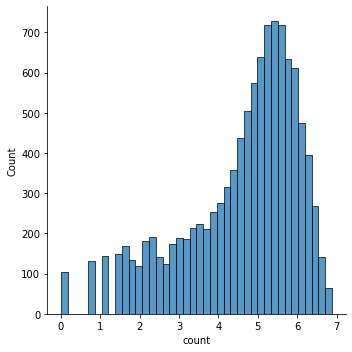

In [10]:
sns.displot(np.log(train['count']))
plt.show()

In [11]:
sub=pd.read_csv('/kaggle/input/bike-sharing-demand/sampleSubmission.csv')
sub

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [12]:
sub['count']=np.exp(result)
sub

,datetime,count
0,2011-01-20 00:00:00,11.915665
1,2011-01-20 01:00:00,4.844916
2,2011-01-20 02:00:00,3.278775
3,2011-01-20 03:00:00,3.452883
4,2011-01-20 04:00:00,2.637747
...,...,...
6488,2012-12-31 19:00:00,192.689974
6489,2012-12-31 20:00:00,148.614282
6490,2012-12-31 21:00:00,100.161860
6491,2012-12-31 22:00:00,100.056898


In [13]:
pd.Series(rf.feature_importances_,index=train2.columns)

season        0.036339
holiday       0.001581
workingday    0.039543
weather       0.010531
temp          0.045649
atemp         0.018552
humidity      0.021074
windspeed     0.011098
hour          0.756307
year          0.031145
weekday       0.028182
dtype: float64

In [14]:
sub.to_csv('sub.csv',index=0)